In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.nn import functional
from torch import optim


training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
train_loader = DataLoader(training_data, batch_size=64, shuffle = True)
test_loader = DataLoader(training_data, batch_size=64, shuffle = True)

100%|██████████| 170M/170M [00:05<00:00, 33.5MB/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


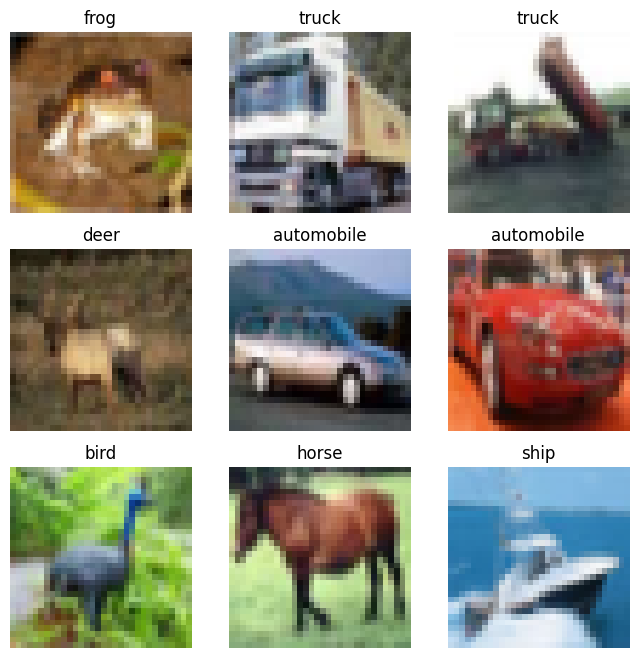

In [2]:
labels_map = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}
# Plot a 3x3 grid of sample images
plt.figure(figsize=(8, 8))
for i in range(9):
    img, label = training_data[i]
    img = img.permute(1, 2, 0)  # Change tensor shape to HWC for plotting

    # Create subplot and set title as label name
    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(img)
    ax.set_title(labels_map[label])
    ax.axis("off")  # Remove axes for cleaner look

plt.show()

In [3]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size= 3, padding=1)
    self.relu1 = nn.ReLU()
    self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size= 3, padding=1)
    self.relu2 = nn.ReLU()
    self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride = 2)

    self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size= 3, padding=1)
    self.relu3 = nn.ReLU()
    self.conv4 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size= 3, padding=1)
    self.relu4 = nn.ReLU()
    self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride = 2)

    self.conv5 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size= 3, padding=1)
    self.relu5 = nn.ReLU()
    self.conv6 = nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size= 3, padding=1)
    self.relu6 = nn.ReLU()
    self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride = 2)

    self.linear1 = nn.Linear(in_features=2048, out_features=256)
    self.relu7 = nn.ReLU()
    self.linear2 = nn.Linear(in_features=256, out_features=128)
    self.relu8 = nn.ReLU()

    self.linear3 = nn.Linear(in_features=128, out_features=10)

  def forward(self, x):
      x = self.relu1(self.conv1(x))
      x = self.relu2(self.conv2(x))
      x = self.maxpool1(x)

      x = self.relu3(self.conv3(x))
      x = self.relu4(self.conv4(x))
      x = self.maxpool2(x)

      x = self.relu5(self.conv5(x))
      x = self.relu6(self.conv6(x))
      x = self.maxpool3(x)

      x = torch.flatten(x, start_dim=1)
      x = self.relu7(self.linear1(x))
      x = self.relu8(self.linear2(x))

      x = self.linear3(x)
      return x




In [4]:
model = Model()
img = train_loader
# img.size()

for data in train_loader:
  print(model(data[0]))
  break
# model(img)

tensor([[ 0.0536,  0.0381, -0.0327, -0.0417,  0.0221,  0.0066, -0.0660, -0.0169,
         -0.0320, -0.0076],
        [ 0.0536,  0.0383, -0.0327, -0.0416,  0.0220,  0.0066, -0.0659, -0.0170,
         -0.0321, -0.0076],
        [ 0.0536,  0.0381, -0.0327, -0.0417,  0.0219,  0.0066, -0.0660, -0.0168,
         -0.0321, -0.0075],
        [ 0.0535,  0.0381, -0.0327, -0.0417,  0.0220,  0.0065, -0.0660, -0.0169,
         -0.0320, -0.0076],
        [ 0.0536,  0.0382, -0.0327, -0.0417,  0.0219,  0.0066, -0.0660, -0.0170,
         -0.0320, -0.0075],
        [ 0.0536,  0.0382, -0.0328, -0.0417,  0.0220,  0.0066, -0.0659, -0.0169,
         -0.0320, -0.0076],
        [ 0.0536,  0.0381, -0.0328, -0.0418,  0.0219,  0.0065, -0.0660, -0.0168,
         -0.0321, -0.0076],
        [ 0.0536,  0.0382, -0.0327, -0.0417,  0.0219,  0.0065, -0.0659, -0.0168,
         -0.0320, -0.0076],
        [ 0.0534,  0.0383, -0.0326, -0.0417,  0.0219,  0.0065, -0.0660, -0.0170,
         -0.0321, -0.0076],
        [ 0.0536,  

In [5]:
model = Model().to("cuda")
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
criterion = criterion.to("cuda")

In [6]:
num_epochs = 40

for epoch in range(num_epochs):
  running_loss = 0
  for i, data in enumerate(train_loader):
    img, label = data
    img, label = img.to("cuda"), label.to("cuda")
    optimizer.zero_grad()
    outputs = model(img)
    loss = criterion(outputs, label)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    # Print average loss after each epoch
    epoch_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}] finished with average loss: {epoch_loss:.4f}')

Streaming output truncated to the last 5000 lines.
Epoch [34/40] finished with average loss: 0.0502
Epoch [34/40] finished with average loss: 0.0502
Epoch [34/40] finished with average loss: 0.0503
Epoch [34/40] finished with average loss: 0.0506
Epoch [34/40] finished with average loss: 0.0507
Epoch [34/40] finished with average loss: 0.0507
Epoch [34/40] finished with average loss: 0.0508
Epoch [34/40] finished with average loss: 0.0509
Epoch [34/40] finished with average loss: 0.0510
Epoch [34/40] finished with average loss: 0.0512
Epoch [34/40] finished with average loss: 0.0513
Epoch [34/40] finished with average loss: 0.0514
Epoch [34/40] finished with average loss: 0.0514
Epoch [34/40] finished with average loss: 0.0515
Epoch [34/40] finished with average loss: 0.0516
Epoch [34/40] finished with average loss: 0.0516
Epoch [34/40] finished with average loss: 0.0517
Epoch [34/40] finished with average loss: 0.0518
Epoch [34/40] finished with average loss: 0.0519
Epoch [34/40] fini

In [11]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0

    for images, labels in test_loader:
        images = images.to("cuda")
        labels = labels.to("cuda")  # Move labels to the GPU as well
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print("Test Accuracy:", 100 * correct / total)


Test Accuracy: 98.512
